In [2]:
import pandas as pd
import numpy as np
import openpyxl
import os
import glob

e:\Installation\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
e:\Installation\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [6]:
!pip install openpyxl==3.0.10



^C


In [5]:
df = pd.read_excel('test_dir/lstm_dmc - Copy.xlsx')

In [6]:
df.head()

,Date,Affected
0,2022/09/01,12.0
1,2022/09/02,0.0
2,2022/09/03,35.0
3,2022/09/04,13.0
4,2022/09/05,11.0


In [7]:
# #interchange the position of last two columns
# cols = list(df.columns)
# cols = [cols[-1]] + cols[:-1]
# df = df[cols]
# # df.head()
# #rename the Filename column to Date
# df.rename(columns={'Filename':'Date'}, inplace=True)
# #drop Hospital column
# df.drop(['Hospital'], axis=1, inplace=True)
# # sort the dataframe by Date column
df.sort_values(by=['Date'], inplace=True)
df.head(30)

,Date,Affected
123,2022/08/01,9.0
124,2022/08/02,2.0
125,2022/08/03,8.0
126,2022/08/04,6.0
127,2022/08/05,0.0
128,2022/08/06,0.0
129,2022/08/07,4.0
130,2022/08/10,9.0
131,2022/08/11,4.0
132,2022/08/12,4.0


In [27]:
# every cell of the Filename column , only keep the number part, remove the characters
# df['Filename'] = df['Filename'].str.extract('(\d+)', expand=False)

In [6]:
# from the first column, extract the first 8 characters from each cell i.e make '20220901_dengue_all' to '20220901'
# df['filename'] = df['filename'].str[:8]

In [34]:
df.head()

,Filename,Hospital,Affected
0,20190904,XvKv †gwW‡Kj K‡jR nvmcvZvj,47
1,20190905,XvKv †gwW‡Kj K‡jR nvmcvZvj,63
2,20211213,XvKv †gwW‡Kj K‡jR nvmcvZvj,1
3,20211214,XvKv †gwW‡Kj K‡jR nvmcvZvj,3
4,20211215,XvKv †gwW‡Kj K‡jR nvmcvZvj,1


In [9]:
#save it to the lsmt_dmc.xlsx file
df.to_excel('test_dir/lstm_dmc - Copy.xlsx', index=False)

C:\Users\aniki\AppData\Local\Temp/ipykernel_19056/2781592732.py:2: UserWarning: Pandas requires version '3.0.3' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  df.to_excel('test_dir/lstm_dmc - Copy.xlsx', index=False)


In [9]:
#drop first column
# df = df.drop(df.columns[0], axis=1)

In [24]:
# # rename columns 'affected' and 'date'
# df.columns = ['date','affected']
# df.head()
# # rename the Filename column to 'date' and shift it in the second column and shift "Affected" to the third column
# df = df.rename(columns={'Filename':'Date'}).shift(1,axis=1)
# df.head()

,Hospital,Affected,Date
0,None,XvKv †gwW‡Kj K‡jR nvmcvZvj,47
1,None,XvKv †gwW‡Kj K‡jR nvmcvZvj,63
2,None,XvKv †gwW‡Kj K‡jR nvmcvZvj,1
3,None,XvKv †gwW‡Kj K‡jR nvmcvZvj,3
4,None,XvKv †gwW‡Kj K‡jR nvmcvZvj,1


In [91]:
# convert the date column to date format yyyy/mm/dd ..i.e 20190904 to 2019/09/04 without using datetime
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].str[:4] + '/' + df['Date'].str[4:6] + '/' + df['Date'].str[6:]
df.head()


,Date,Affected
219,2021//,0
73,2019/09/01,92
74,2019/09/02,82
75,2019/09/03,64
0,2019/09/04,47


In [93]:
#swap columns
# df = df[['date', 'affected']]
#drop the first row
# df = df.iloc[1:]
#reset the index
df = df.reset_index(drop=True)
#drop the first row
df = df.iloc[1:]
df.head()

,Date,Affected
1,2019/09/01,92
2,2019/09/02,82
3,2019/09/03,64
4,2019/09/04,47
5,2019/09/05,63


In [46]:
# make samples in this way: 1st sample: 0-10th row, 2nd sample: 1-11th row, 3rd sample: 2-12th row, etc
samples = []

for i in range(len(df) - 10):
    samples.append(df.iloc[i:i + 10])

samples[0]

,Date,Affected
0,2019/09/01,92
1,2019/09/02,82
2,2019/09/03,64
3,2019/09/04,47
4,2019/09/05,63
5,2019/09/06,61
6,2019/09/07,33
7,2019/09/08,52
8,2019/09/10,81
9,2019/09/11,49


In [55]:
df.shape

(219, 2)

In [47]:
samples[0]

,Date,Affected
0,2019/09/01,92
1,2019/09/02,82
2,2019/09/03,64
3,2019/09/04,47
4,2019/09/05,63
5,2019/09/06,61
6,2019/09/07,33
7,2019/09/08,52
8,2019/09/10,81
9,2019/09/11,49


In [75]:
df.head()

,Date,Affected
0,2019/09/01,92
1,2019/09/02,82
2,2019/09/03,64
3,2019/09/04,47
4,2019/09/05,63


In [63]:
samples = []

for i in range(len(df) - 10):
    samples.append(df.iloc[i:i + 10])

# run LSTM model on the first sample

samples[0]




,Date,Affected
0,2019/09/01,92
1,2019/09/02,82
2,2019/09/03,64
3,2019/09/04,47
4,2019/09/05,63
5,2019/09/06,61
6,2019/09/07,33
7,2019/09/08,52
8,2019/09/10,81
9,2019/09/11,49


In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
def prepare_data(df):
    data = df['Affected'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

scaled_data, scaler = prepare_data(samples[0])
    

In [74]:
scaled_data

array([[1.        ],
       [0.83050847],
       [0.52542373],
       [0.23728814],
       [0.50847458],
       [0.47457627],
       [0.        ],
       [0.3220339 ],
       [0.81355932],
       [0.27118644]])

In [73]:
# split data into training and test data...first column as X and second column as y...last row is test data...thats how get Xtrain, ytrain, Xtest, ytest

def split_data(scaled_data):
    X, y = [], []
    for i in range(len(scaled_data)):
        X.append(scaled_data[i][0])
        y.append(scaled_data[i][1])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], 1, 1))
    return X, y

X, y = split_data(scaled_data)




IndexError: index 1 is out of bounds for axis 0 with size 1

In [95]:
# remove rows where df['Affected] is not a number
df = df[df['Affected'].apply(lambda x: isinstance(x, (int, np.int64)))]
df['Affected'].value_counts()

Affected
1     26
2     19
0     18
4     13
3     12
5     10
8      8
19     6
13     5
21     5
10     5
6      5
9      4
12     4
7      4
15     4
17     3
24     3
25     3
11     2
18     2
14     2
16     2
29     2
37     2
35     2
47     2
36     2
33     2
23     2
40     2
81     2
82     1
49     1
64     1
63     1
61     1
52     1
34     1
51     1
31     1
20     1
39     1
46     1
22     1
30     1
92     1
Name: count, dtype: int64

In [ ]:
# Run LSTM model on the first sample

def fit_model(X, y):
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)
    return model

model = fit_model(X, y)

# make predictions


In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense



# make it a function
def prepare_data(df):
    data = df['Affected'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_normalized = scaler.fit_transform(data)
    window_size = 10
    samples = [data_normalized[i:i + window_size] for i in range(len(data_normalized) - window_size + 1)]
    samples = np.array(samples)
    X = samples[:, :-1]
    y = samples[:, -1]
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y, scaler, samples


X, y, scaler, samples =  prepare_data(df)

# You can further fine-tune the model, save it, or use it for predictions.


In [97]:
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)
print("samples.shape: ", samples.shape)

X.shape:  (189, 9, 1)
y.shape:  (189, 1)
samples.shape:  (189, 10, 1)


In [58]:
import tensorflow as tf
#convert X to tensor
X = tf.convert_to_tensor(X)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [98]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(9, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [101]:
# Train the model on each sample
predictions = []
errors = []


for i in range(len(samples)):
    X_train = X[i, :, :].reshape(1, X.shape[1], 1)
    y_train = y[i].reshape(1, 1)
    model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0)

    # Once trained, you can make predictions and calculate errors for each sample
    prediction = model.predict(X_train)
    predictions.append(prediction)
    print(f"Sample {i + 1}, Prediction: {scaler.inverse_transform(prediction)}, True Value: {scaler.inverse_transform(y_train)}")
    # use RMSE as the error metric
    error = np.sqrt(np.mean((prediction - y_train) ** 2))
    errors.append(error)
    print(f"Sample {i + 1}, Error: {error}")
predictions = np.array(predictions).reshape(-1, 1)
errors = np.array(errors).reshape(-1, 1)


1/1 [==============================] - 0s 15ms/step
Sample 1, Prediction: [[54.10781]], True Value: [[49.]]
Sample 1, Error: 0.055519692275835086
1/1 [==============================] - 0s 17ms/step
Sample 2, Prediction: [[51.512043]], True Value: [[51.]]
Sample 2, Error: 0.005565689957660158
1/1 [==============================] - 0s 12ms/step
Sample 3, Prediction: [[36.138298]], True Value: [[40.]]
Sample 3, Error: 0.04197500581326691
1/1 [==============================] - 0s 19ms/step
Sample 4, Prediction: [[32.029213]], True Value: [[34.]]
Sample 4, Error: 0.021421580210975955
1/1 [==============================] - 0s 15ms/step
Sample 5, Prediction: [[36.396122]], True Value: [[36.]]
Sample 5, Error: 0.004305656837380489
1/1 [==============================] - 0s 4ms/step
Sample 6, Prediction: [[41.52773]], True Value: [[39.]]
Sample 6, Error: 0.027475315591563354
1/1 [==============================] - 0s 22ms/step
Sample 7, Prediction: [[48.858597]], True Value: [[46.]]
Sample 7, Err

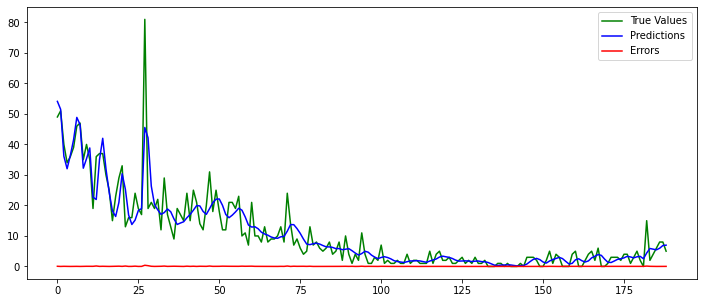

In [102]:
#plot predictions and true values 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(scaler.inverse_transform(y), label='True Values', color = 'green')
plt.plot(scaler.inverse_transform(predictions), label='Predictions', color = 'blue')
plt.plot(errors, label='Errors',color='red')
plt.legend()
plt.show()

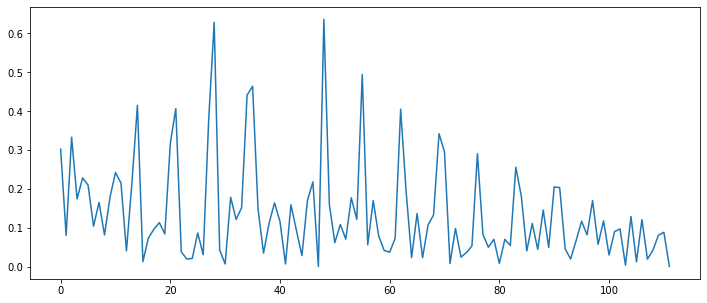

In [21]:
#plot errors
plt.figure(figsize=(12, 5))
plt.plot(errors)
plt.show()